In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Reading Data

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/EFQM/session 5/Air_pollution.csv', index_col=['No'])
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
No,,,,,,,,,,,,
1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


#Check data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 1 to 43824
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   41757 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.3+ MB


#Fill pm2.5 Feature




In [ ]:
nan_feature = df['pm2.5'].copy().dropna()
mean = nan_feature.mean()
df['pm2.5'].fillna(mean, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 1 to 43824
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   43824 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   cbwd    43824 non-null  object 
 9   Iws     43824 non-null  float64
 10  Is      43824 non-null  int64  
 11  Ir      43824 non-null  int64  
dtypes: float64(4), int64(7), object(1)
memory usage: 4.3+ MB


#create dummy data for cbwd feature

In [ ]:
dummy_cwd = pd.get_dummies(df['cbwd'])
df = pd.concat([df, dummy_cwd], axis=1)
df = df.drop(columns=['cbwd'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43824 entries, 1 to 43824
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    43824 non-null  int64  
 1   month   43824 non-null  int64  
 2   day     43824 non-null  int64  
 3   hour    43824 non-null  int64  
 4   pm2.5   43824 non-null  float64
 5   DEWP    43824 non-null  int64  
 6   TEMP    43824 non-null  float64
 7   PRES    43824 non-null  float64
 8   Iws     43824 non-null  float64
 9   Is      43824 non-null  int64  
 10  Ir      43824 non-null  int64  
 11  NE      43824 non-null  bool   
 12  NW      43824 non-null  bool   
 13  SE      43824 non-null  bool   
 14  cv      43824 non-null  bool   
dtypes: bool(4), float64(4), int64(7)
memory usage: 4.2 MB


#Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
X = df.drop(columns=['TEMP'])
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index)
scaled_data['TEMP'] = df['TEMP']
scaled_data.head()

,year,month,day,hour,pm2.5,DEWP,PRES,Iws,Is,Ir,NE,NW,SE,cv,TEMP
No,,,,,,,,,,,,,,,
1,-1.414601,-1.60171,-1.673744,-1.661325,0.0,-1.580878,0.443328,-0.441894,-0.069353,-0.137667,-0.358747,1.448138,-0.732019,-0.522096,-11.0
2,-1.414601,-1.60171,-1.673744,-1.516862,0.0,-1.580878,0.345943,-0.379306,-0.069353,-0.137667,-0.358747,1.448138,-0.732019,-0.522096,-12.0
3,-1.414601,-1.60171,-1.673744,-1.372399,0.0,-1.580878,0.248559,-0.343514,-0.069353,-0.137667,-0.358747,1.448138,-0.732019,-0.522096,-11.0
4,-1.414601,-1.60171,-1.673744,-1.227936,0.0,-1.580878,0.248559,-0.280926,-0.069353,-0.137667,-0.358747,1.448138,-0.732019,-0.522096,-14.0
5,-1.414601,-1.60171,-1.673744,-1.083473,0.0,-1.511594,0.151174,-0.218339,-0.069353,-0.137667,-0.358747,1.448138,-0.732019,-0.522096,-12.0


#Generate Sequential Data

In [ ]:
X = []
y = []

sequence_length = 4
for i in range(sequence_length, len(scaled_data)):
    X.append(scaled_data.iloc[i-sequence_length:i].values)
    y.append(scaled_data.iloc[i]['TEMP'])

X = np.array(X)
y = np.array(y)

X, y = np.array(X), np.array(y)
X.shape, y.shape

((43820, 4, 15), (43820,))

#ُSpilt dataset into train, test & Validation set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_train.shape, X_val.shape, X_test.shape

((35056, 4, 15), (4382, 4, 15), (4382, 4, 15))

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(X_train, y_train, epochs=32, batch_size=32, validation_data=(X_val, y_val),
                    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 37.0255 - val_loss: 2.2154
Epoch 2/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 3.3293 - val_loss: 1.8250
Epoch 3/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 3.0441 - val_loss: 1.7050
Epoch 4/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - loss: 2.8410 - val_loss: 1.7890
Epoch 5/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 2.8296 - val_loss: 1.5395
Epoch 6/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.7317 - val_loss: 1.6131
Epoch 7/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 2.6817 - val_loss: 1.6239
Epoch 8/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.4842 - val_loss: 1.5460
Epoch 9/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.5956 - val_loss: 1.5246
Epoch 10/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 2.5600 - val_loss: 1.5846
Epoch 11/32
1096/1096 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.3996 - val_loss: 1.5465
Epoch 12/32
1096/1096 ━━━━━━

#Model Training Diagram

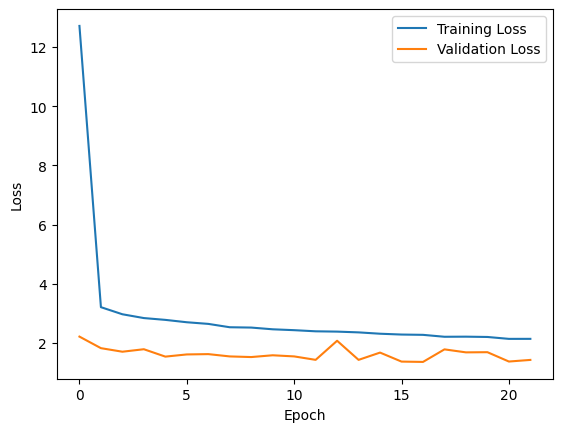

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

#Model Information

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 128)                 │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,685 (217.52 KB)

 Trainable params: 18,561 (72.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 37,124 (145.02 KB)

#Evaluation

137/137 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4559
Test Loss: 1.4475340843200684
137/137 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


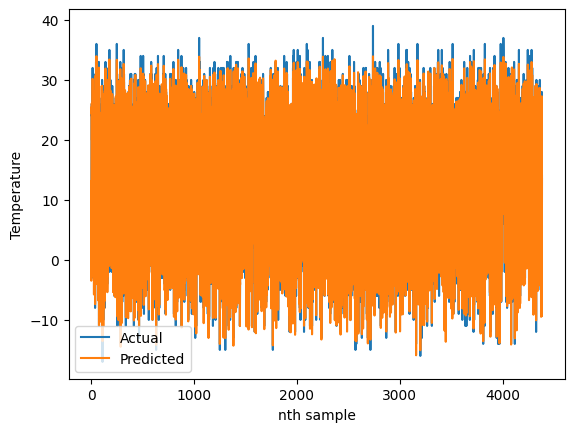

In [ ]:
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

y_pred = model.predict(X_test)
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('nth sample')
plt.ylabel('Temperature')
plt.legend()